<br><font color='navy' size=8><u>Perceptron from Scratch</u></font><br><br>
<b><font color='navy'>Frank Rosenblatt's Perceptron</font> or in short the '<font color='navy'>Perceptron</font>' is widely considered to be the <font color='navy'>very first neural model</font> even though <font color='navy'>McCulloch Pitts neural model</font> came around 13 years before it and the simple reason behind it is the fact that <font color='navy'>perceptron</font> is the <font color='navy'>first neural model</font> that is <font color='navy'>capable of learning</font>.</b> 
    
<b>Okay, so what do we mean by learning? Unlike <font color='navy'>McCulloch Pitts</font> where the <font color='navy'>weights and biases</font> had to be <font color='navy'>hand coded</font>, <font color='navy'>perceptron</font> can <font color='navy'>learn</font> these <font color='navy'>weights and biases</font> by looking at the data itself. Also <font color='navy'>McCulloch Pitts</font> works only for <font color='navy'>binary inputs and outputs</font> whereas <font color='navy'>perceptron</font> works for any <font color='navy'>real number inputs and outputs</font>.</b> 
    
<b>Note that there are multiple versions of perceptron and even the McCulloch Pitts itself is sometimes referred to as perceptron. But what's shown below is the widely used definition of perceptron and it is considered to be the simplest learnable neural model and is considered to be the <font color='navy'>fundamental unit</font> of all other <font color='navy'>complex neural networks</font>.</b> <br><br><b><font color='black'>Note:</font> <font color='darkred'>Perceptron can be used only on a strictly linearly separable binary class dataset</font></b><br>
# <font color='navy'>Architecture of Perceptron</font>

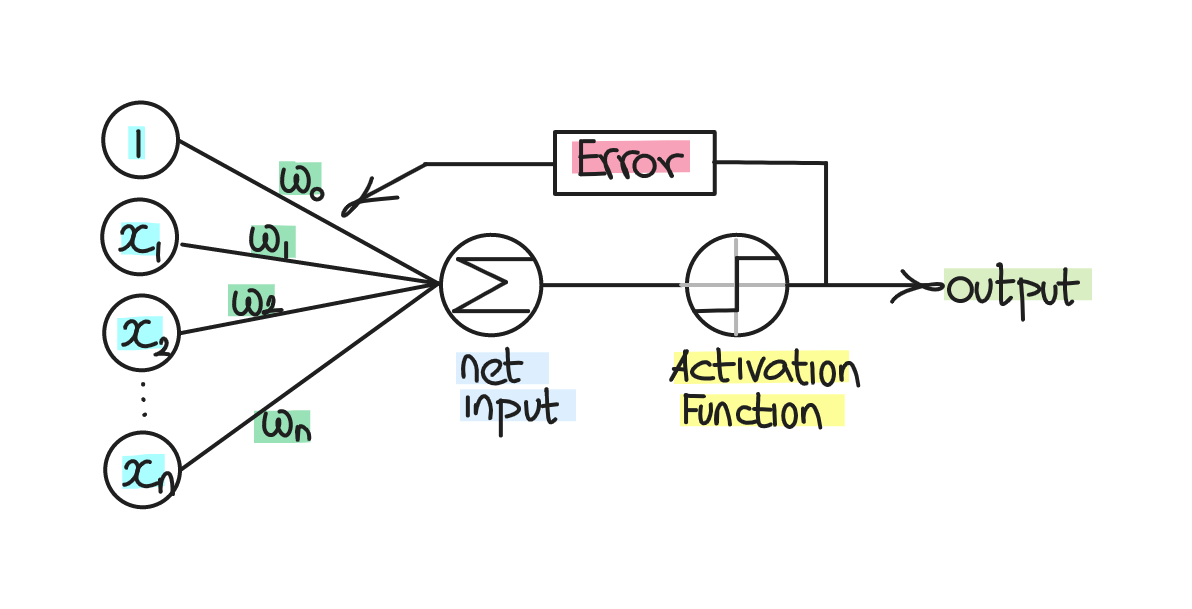

In [1]:
# loading the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# loading the data from scikit-learn
data,labels=make_blobs(n_features=3,n_samples=100, centers=2)

In [4]:
# converting the above data into a dataframe
df=pd.DataFrame(data, columns=['x1','x2','x3'])
df['labels']=labels
df.head()

,x1,x2,x3,labels
0,4.486062,-5.677568,6.110462,0
1,-6.675358,-4.639986,8.439058,1
2,-7.447927,-5.142129,7.018258,1
3,2.001071,-6.979936,3.300927,0
4,-8.476516,-5.480927,6.976501,1


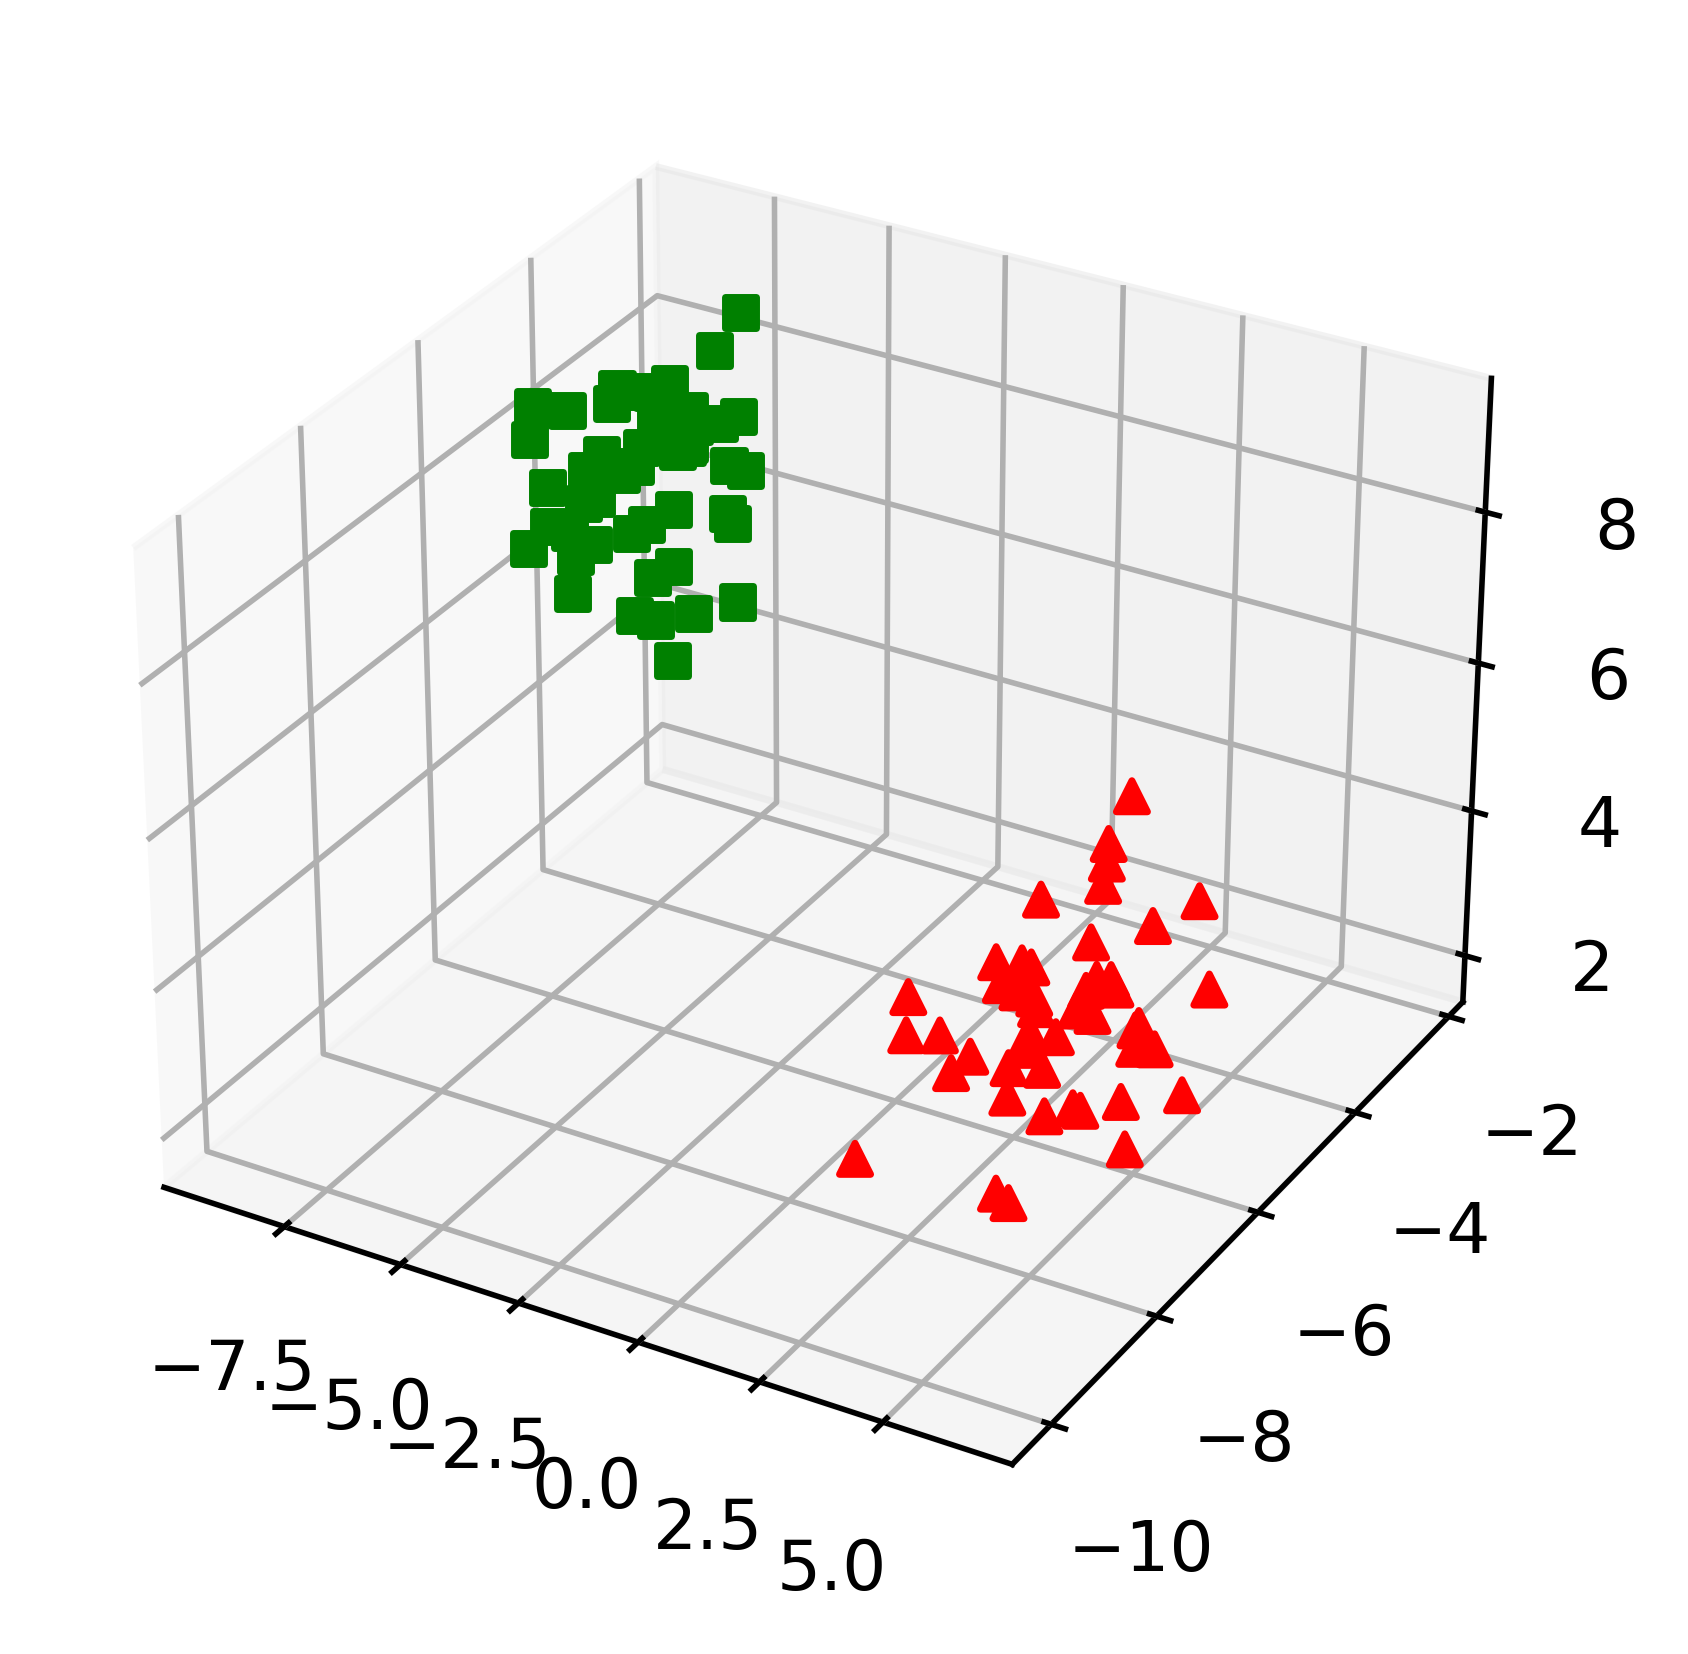

In [5]:
# visualizing the above dataframe
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
ax.scatter(df.x1[df.labels==0], 
           df.x2[df.labels==0], 
           df.x3[df.labels==0], 
           marker='^', color='red', alpha=1)
ax.scatter(df.x1[df.labels==1], 
           df.x2[df.labels==1], 
           df.x3[df.labels==1], 
           marker='s', color='green', alpha=1);

In [6]:
def perceptron(X,y,eta,epochs):
    n,dim=X.shape # number of datapoints and dimension
    dim+=1
    
    b=np.ones([n,1]) # column for bias term
    X=X.values # attaching the above column to the X variable
    X=np.hstack([b,X])
    
    w=np.random.uniform(-10,10,dim) # randomly initializing weights
    
    for epoch in range(epochs): # running the algorithm for many epochs
               
        misclassified=0 # counting misclassified point
        for i in range(n):
            net_input=np.dot(w,X[i]) # finding the weighted sum of input vector
            
            if net_input>=0: # passing the above net input through step function
                y_hat=1
            else:
                y_hat=0
                
            if y[i]!=y_hat: # update weight when there's mislabelling 
                w+=(eta*(y[i]-y_hat)*X[i]) 
                misclassified+=1 # increment misclassified point counter
        
        if misclassified==0: # early stop when perfect classification is done
            return w, epoch
    
    return w, epoch

In [7]:
# segregating the predictor and target variable
X=df.drop('labels',axis=1)
y=df.labels

In [8]:
# fitting the perceptron on the above data
weight,epoch=perceptron(X,y,0.1,1000000)

print(f'The weight vector is {weight}\nThe perceptron classified in {epoch} epochs')

The weight vector is [ 5.28670879 -8.43150775  0.31535843  2.97025391]
The perceptron classified in 1 epochs


In [9]:
w0,w1,w2,w3=weight # capturing the bias and weights

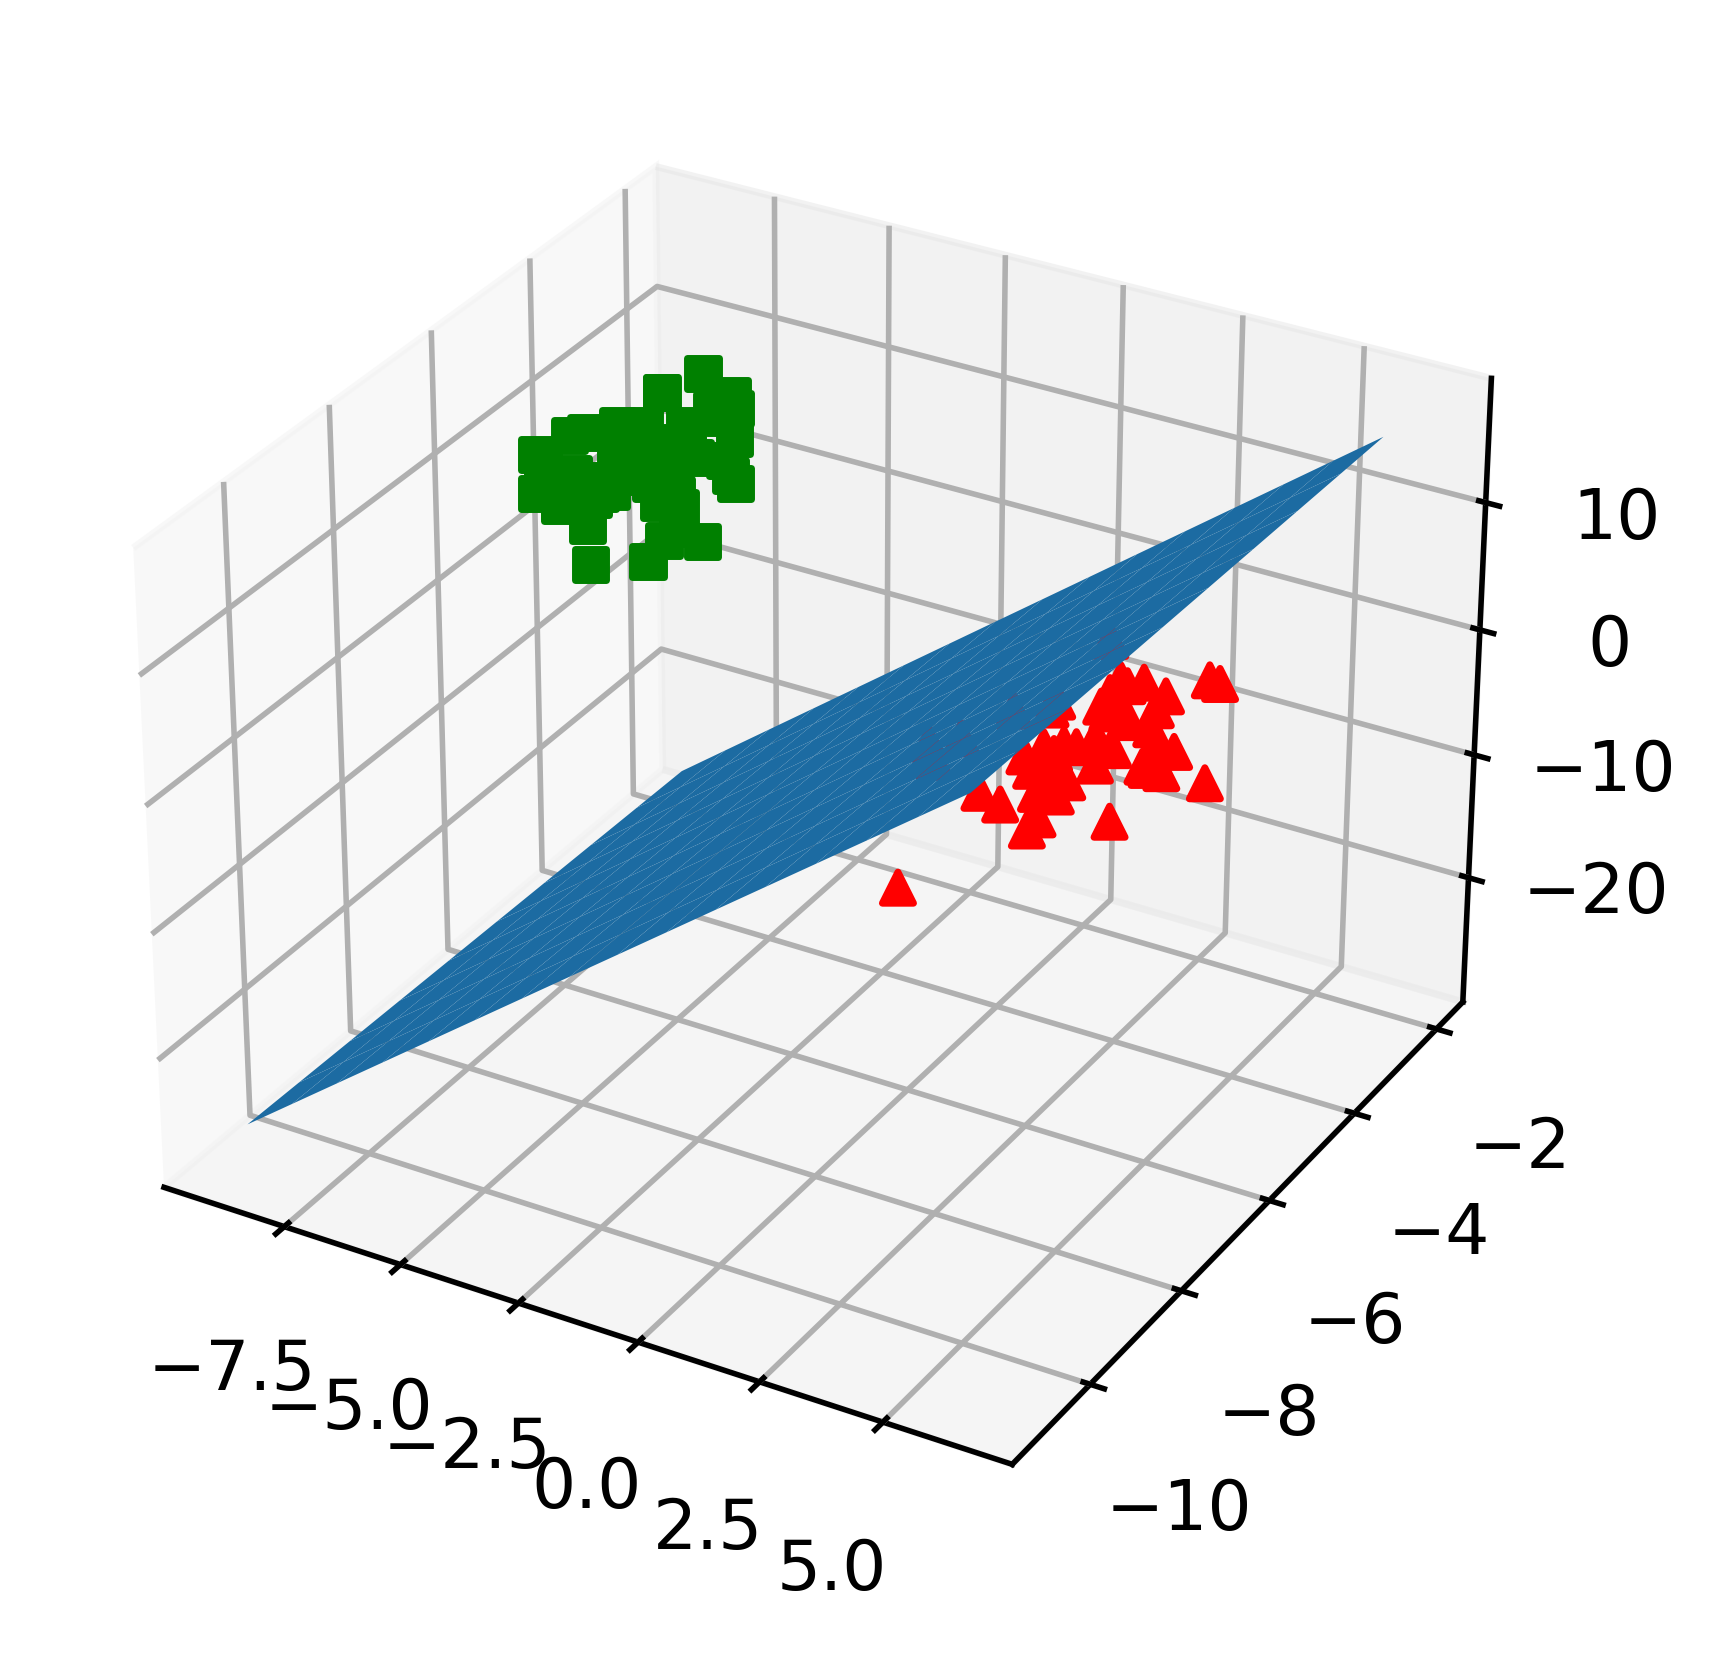

In [10]:
# visualizing the above dataframe
fig = plt.figure(dpi=500)
plt.title('Segragated Classes')
ax = fig.gca(projection='3d')
ax.scatter(df.x1[df.labels==0], 
           df.x2[df.labels==0], 
           df.x3[df.labels==0], 
           marker='^', color='red', alpha=1)
ax.scatter(df.x1[df.labels==1], 
           df.x2[df.labels==1], 
           df.x3[df.labels==1], 
           marker='s', color='green', alpha=1)

x1=list(range(int(df.x1.min()-1),int(df.x1.max()+1)))
x2=list(range(int(df.x2.min()-1),int(df.x2.max()+1)))

x1, x2 = np.meshgrid(x1, x2)
eq = - (w0/w3) - (w1/w3) * x1 - (w2/w3) * x2
ax.plot_surface(x1, x2, eq);

# <font color='navy'>Limitations of Perceptron</font>
<b><font color='navy'>Perceptrons</font> in its basic form with only one layer could not be used to solve <font color='navy'>XOR problem</font> (as shown in the diagram below) which lead to the idea of <font color='navy'>Multilayer Perceptrons</font> which could solve not just <font color='navy'>XOR</font> but other wide range of problems as well.</b>
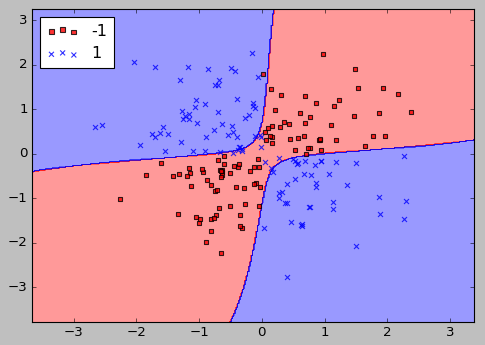